# Figure 1

## Version 2: splitted leaf only

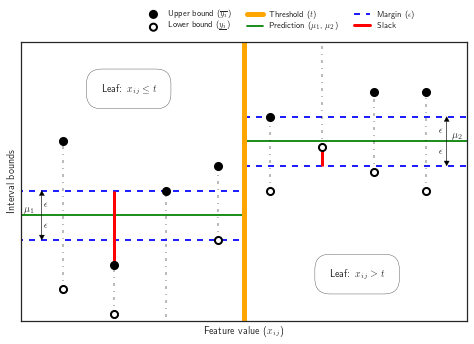

In [3]:
#%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import infty as inf
from matplotlib.lines import Line2D
from matplotlib import rc
rc('text', usetex=True)


def plot_slack(x, y, mu, epsilon, is_lower, zorder):
    slack_color = "red"
    if not is_lower and y < mu + epsilon:
        plt.vlines(x, ymin=y, ymax=mu + epsilon, color=slack_color, linewidth=3, zorder=zorder, label="Slack")
    elif is_lower and y > mu - epsilon:
        plt.vlines(x, ymin=y, ymax=mu - epsilon, color=slack_color, linewidth=3, zorder=zorder, label="Slack")

        
def plot_bound(x, y, is_lower, zorder):
    lower_style = dict(s=50, facecolors='white', edgecolors='black', linewidth=2)
    upper_style = dict(s=50, facecolors='black', edgecolors='black', linewidth=2)
    plt.scatter(x, y, zorder=zorder, 
                label=r"Lower bound ($\underline{y_i}$)" if is_lower else r"Upper bound ($\overline{y_i}$)", 
                **(lower_style if is_lower else upper_style))
        

def plot_leaf_intervals(leaf_x, leaf_y, mu):
    for i in range(len(leaf_y)):
        if not np.isinf(leaf_y[i][0]):
            plot_slack(leaf_x[i], leaf_y[i][0], mu, epsilon, True, zorder["slack"])
            plot_bound(leaf_x[i], leaf_y[i][0], True, zorder["points"])      
        if not np.isinf(leaf_y[i][1]):
            plot_slack(leaf_x[i], leaf_y[i][1], mu, epsilon, False, zorder["slack"])
            plot_bound(leaf_x[i], leaf_y[i][1], False, zorder["points"])
        plt.vlines(leaf_x[i], ymin=max(leaf_y[i][0], -99999), ymax=min(leaf_y[i][1], 99999), linestyles="-.", alpha=0.3)
    
    
def plot_separator(mu, epsilon, x_start, x_end, zorder, is_left_leaf):
    margin_color = "blue"
    separator_color = "green"
    padding = 0.5
    if is_left_leaf:
        plt.hlines(y=mu, xmin=x_start - 5 * padding, xmax=x_end + padding, color=separator_color, linestyle="-", zorder=zorder, label=r"Prediction ($\mu_1$, $\mu_2$)")
        plt.text(x=x_start - padding * 1.5, y=mu + 0.1, s=r"$\mu_1$", zorder=zorder)
                 #bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
        plt.hlines(y=mu - epsilon, xmin=x_start - 5 * padding, xmax=x_end + padding, color=margin_color, linestyle="--", zorder=zorder, label=r"Margin ($\epsilon$)")
        plt.hlines(y=mu + epsilon, xmin=x_start - 5 * padding, xmax=x_end + padding, color=margin_color, linestyle="--", zorder=zorder)
        plt.arrow(x_start - padding * 0.8, mu, 0, epsilon - 0.2, head_width=0.1, head_length=0.2, fc='k', ec='k', zorder=zorder)
        plt.arrow(x_start - padding * 0.8, mu, 0, -epsilon + 0.2, head_width=0.1, head_length=0.2, fc='k', ec='k', zorder=zorder)
        plt.text(x_start - padding * 0.7, mu + 0.35 * epsilon, s=r"$\epsilon$", zorder=zorder)
        plt.text(x_start - padding * 0.7, mu - 0.5 * epsilon, s=r"$\epsilon$", zorder=zorder)
    else:
        plt.hlines(y=mu, xmin=x_start - padding, xmax=x_end + 5.0 * padding, color=separator_color, linestyle="-", zorder=zorder, label=r"Prediction ($\mu_L$, $\mu_R$)")
        plt.text(x=x_end + padding * 1.0, y=mu + 0.1, s=r"$\mu_2$", zorder=zorder)
        plt.hlines(y=mu - epsilon, xmin=x_start - padding, xmax=x_end + 5.0 * padding, color=margin_color, linestyle="--", zorder=zorder, label=r"Margin ($\epsilon$)")
        plt.hlines(y=mu + epsilon, xmin=x_start - padding, xmax=x_end + 5.0 * padding, color=margin_color, linestyle="--", zorder=zorder)
        plt.arrow(x_end + padding * 0.8, mu, 0, epsilon - 0.2, head_width=0.1, head_length=0.2, fc='k', ec='k', zorder=zorder)
        plt.arrow(x_end + padding * 0.8, mu, 0, -epsilon + 0.2, head_width=0.1, head_length=0.2, fc='k', ec='k', zorder=zorder)
        plt.text(x_end + padding * 0.5, mu + 0.35 * epsilon, s=r"$\epsilon$", zorder=zorder)
        plt.text(x_end + padding * 0.5, mu - 0.5 * epsilon, s=r"$\epsilon$", zorder=zorder)
    
    
def plot_split(threshold, zorder):
    plt.text(1.75, 5, r"Leaf: $x_{ij} \leq t$", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=1.5))
    plt.text(6.15, -2.5, r"Leaf: $x_{ij} > t$", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=1.5))
    plt.axvline(threshold, linewidth=5, color="orange", label=r"Threshold ($t$)", zorder=zorder)
    
    
def make_legend():
    font_properties = {}  #{'size': 12, 'style': 'normal'}
    handles, labels = plt.gca().get_legend_handles_labels()
    filtered_legend = {l: h for h, l in zip(handles, labels)}
    
    legend_keys = [r"Upper bound ($\overline{y_i}$)", r"Lower bound ($\underline{y_i}$)", r"Threshold ($t$)", r"Prediction ($\mu_1$, $\mu_2$)", r"Margin ($\epsilon$)", r"Slack"]
    plt.legend([filtered_legend[k] for k in legend_keys], legend_keys, ncol=3,
               bbox_to_anchor=(0.82, 1.01), bbox_transform=plt.gcf().transFigure, prop=font_properties)
    
    
if __name__ == "__main__":  
    plt.clf()
    
    # Figure data
    y = [(-3, 3), (-4, -2), (-inf, 1), (-1, 2), (1, 4), (2.75, inf), (1.75, 5), (1.0, 5.0)]
    x = [1, 2, 3, 4, 5, 6, 7, 8]
    mu_1 = 0.0
    mu_2 = 3.0
    epsilon = 1.0
    split_threshold = 4.5
      
    # Figure appearance
    zorder = {"points": 3,
              "separator": 1,
              "slack": 2,
              "split": 1}  # Order of parts on the z axis
    sns.set_style("white")
    plt.gcf().set_size_inches(8, 5)
    plt.xlim([0.2, 8.8])
    plt.ylim(-4.3, 7)
    plt.xlabel(r"Feature value ($x_{ij}$)")
    plt.ylabel(r"Interval bounds")
    plt.setp(plt.gca().get_xticklabels(), visible=False)
    plt.setp(plt.gca().get_yticklabels(), visible=False)
    
    # Plot separator and margin
    plot_separator(mu_1, epsilon, 1, 4, zorder["separator"], True)
    plot_separator(mu_2, epsilon, 5, 8, zorder["separator"], False)
    plot_split(split_threshold, zorder["split"])
    
    # Plot leaf intervals
    plot_leaf_intervals(x[:4], y[:4], mu_1)
    plot_leaf_intervals(x[4:], y[4:], mu_2)
    
    # Plot the legend
    make_legend()
    
    # Save to file
    plt.savefig("split_leaf_cost.pdf", bbox_inches="tight")
    

## Version 2: unsplitted + splitted leaf

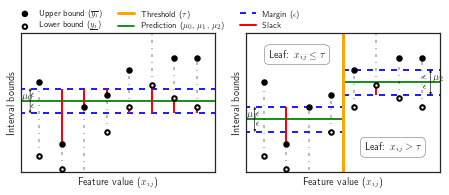

In [43]:
#%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import infty as inf
from matplotlib.lines import Line2D
from matplotlib import rc
rc('text', usetex=True)


def plot_slack(x, y, mu, epsilon, is_lower, zorder, axis):
    slack_color = "red"
    if not is_lower and y < mu + epsilon:
        axis.vlines(x, ymin=y, ymax=mu + epsilon, color=slack_color, linewidth=2, zorder=zorder, label="Slack")
    elif is_lower and y > mu - epsilon:
        axis.vlines(x, ymin=y, ymax=mu - epsilon, color=slack_color, linewidth=2, zorder=zorder, label="Slack")

        
def plot_bound(x, y, is_lower, zorder, axis):
    lower_style = dict(s=20, facecolors='white', edgecolors='black', linewidth=2)
    upper_style = dict(s=20, facecolors='black', edgecolors='black', linewidth=2)
    axis.scatter(x, y, zorder=zorder, 
                label=r"Lower bound ($\underline{y_i}$)" if is_lower else r"Upper bound ($\overline{y_i}$)", 
                **(lower_style if is_lower else upper_style))
        

def plot_leaf_intervals(leaf_x, leaf_y, mu, axis):
    for i in range(len(leaf_y)):
        if not np.isinf(leaf_y[i][0]):
            plot_slack(leaf_x[i], leaf_y[i][0], mu, epsilon, True, zorder["slack"], axis=axis)
            plot_bound(leaf_x[i], leaf_y[i][0], True, zorder["points"], axis=axis)      
        if not np.isinf(leaf_y[i][1]):
            plot_slack(leaf_x[i], leaf_y[i][1], mu, epsilon, False, zorder["slack"], axis=axis)
            plot_bound(leaf_x[i], leaf_y[i][1], False, zorder["points"], axis=axis)
        axis.vlines(leaf_x[i], ymin=max(leaf_y[i][0], -99999), ymax=min(leaf_y[i][1], 99999), linestyles="-.", alpha=0.3)
    
    
def plot_separator(mu, epsilon, x_start, x_end, zorder, leaf_type, axis):
    margin_color = "blue"
    margin_alpha=1.0
    separator_color = "green"
    padding = 0.5
    if leaf_type == "left":
        axis.hlines(y=mu, xmin=x_start - 5 * padding, xmax=x_end + padding, color=separator_color, linestyle="-", zorder=zorder, label=r"Prediction ($\mu_0$, $\mu_1$, $\mu_2$)")
        axis.text(x=x_start - padding * 1.5, y=mu + 0.1, s=r"$\mu_1$", zorder=zorder)
        axis.hlines(y=mu - epsilon, xmin=x_start - 5 * padding, xmax=x_end + padding, color=margin_color, alpha=margin_alpha, linestyle="--", zorder=zorder, label=r"Margin ($\epsilon$)")
        axis.hlines(y=mu + epsilon, xmin=x_start - 5 * padding, xmax=x_end + padding, color=margin_color, alpha=margin_alpha, linestyle="--", zorder=zorder)
        axis.arrow(x_start - padding * 0.8, mu, 0, epsilon - 0.2, head_width=0.1, head_length=0.2, fc='k', ec='k', zorder=zorder)
        axis.arrow(x_start - padding * 0.8, mu, 0, -epsilon + 0.2, head_width=0.1, head_length=0.2, fc='k', ec='k', zorder=zorder)
        axis.text(x_start - padding * 0.7, mu + 0.35 * epsilon, s=r"$\epsilon$", zorder=zorder)
        axis.text(x_start - padding * 0.7, mu - 0.5 * epsilon, s=r"$\epsilon$", zorder=zorder)
    elif leaf_type == "right":
        axis.hlines(y=mu, xmin=x_start - padding, xmax=x_end + 5.0 * padding, color=separator_color, linestyle="-", zorder=zorder, label=r"Prediction ($\mu_0$, $\mu_1$, $\mu_2$)")
        axis.text(x=x_end + padding * 1.0, y=mu + 0.1, s=r"$\mu_2$", zorder=zorder)
        axis.hlines(y=mu - epsilon, xmin=x_start - padding, xmax=x_end + 5.0 * padding, color=margin_color, alpha=margin_alpha, linestyle="--", zorder=zorder, label=r"Margin ($\epsilon$)")
        axis.hlines(y=mu + epsilon, xmin=x_start - padding, xmax=x_end + 5.0 * padding, color=margin_color, alpha=margin_alpha, linestyle="--", zorder=zorder)
        axis.arrow(x_end + padding * 0.8, mu, 0, epsilon - 0.2, head_width=0.1, head_length=0.2, fc='k', ec='k', zorder=zorder)
        axis.arrow(x_end + padding * 0.8, mu, 0, -epsilon + 0.2, head_width=0.1, head_length=0.2, fc='k', ec='k', zorder=zorder)
        axis.text(x_end + padding * 0.1, mu + 0.35 * epsilon, s=r"$\epsilon$", zorder=zorder)
        axis.text(x_end + padding * 0.1, mu - 0.5 * epsilon, s=r"$\epsilon$", zorder=zorder)
    else:
        axis.hlines(y=mu, xmin=x_start - 5 * padding, xmax=x_end + padding, color=separator_color, linestyle="-", zorder=zorder, label=r"Prediction ($\mu_0$, $\mu_1$, $\mu_2$)")
        axis.text(x=x_start - padding * 1.5, y=mu + 0.1, s=r"$\mu_0$", zorder=zorder)
        axis.hlines(y=mu - epsilon, xmin=x_start - 5 * padding, xmax=x_end + padding, color=margin_color, alpha=margin_alpha, linestyle="--", zorder=zorder, label=r"Margin ($\epsilon$)")
        axis.hlines(y=mu + epsilon, xmin=x_start - 5 * padding, xmax=x_end + padding, color=margin_color, alpha=margin_alpha, linestyle="--", zorder=zorder)
        axis.arrow(x_start - padding * 0.8, mu, 0, epsilon - 0.2, head_width=0.1, head_length=0.2, fc='k', ec='k', zorder=zorder)
        axis.arrow(x_start - padding * 0.8, mu, 0, -epsilon + 0.2, head_width=0.1, head_length=0.2, fc='k', ec='k', zorder=zorder)
        axis.text(x_start - padding * 0.7, mu + 0.35 * epsilon, s=r"$\epsilon$", zorder=zorder)
        axis.text(x_start - padding * 0.7, mu - 0.5 * epsilon, s=r"$\epsilon$", zorder=zorder)
    
def plot_split(threshold, zorder, axis):
    axis.text(1.25, 5, r"Leaf: $x_{ij} \leq \tau$", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.5))
    axis.text(5.5, -2.5, r"Leaf: $x_{ij} > \tau$", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.5))
    axis.axvline(threshold, linewidth=3, color="orange", label=r"Threshold ($\tau$)", zorder=zorder)
    
    
def make_legend():
    font_properties = {}  #{'size': 12, 'style': 'normal'}
    handles, labels = plt.gca().get_legend_handles_labels()
    filtered_legend = {l: h for h, l in zip(handles, labels)}
    
    legend_keys = [r"Upper bound ($\overline{y_i}$)", r"Lower bound ($\underline{y_i}$)", r"Threshold ($\tau$)", r"Prediction ($\mu_0$, $\mu_1$, $\mu_2$)", r"Margin ($\epsilon$)", r"Slack"]
    plt.legend([filtered_legend[k] for k in legend_keys], legend_keys, ncol=3,
               bbox_to_anchor=(0.655, 1.07), bbox_transform=plt.gcf().transFigure, prop=font_properties)
    
    
if __name__ == "__main__": 
    
    import os
    import matplotlib as mpl
    mpl.use('pgf')
    
    def figsize(scale):
        fig_width_pt = 397.48499                        # Get this from LaTeX using \the\textwidth
        inches_per_pt = 1.0/72.27                       # Convert pt to inch
        golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
        fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
        fig_height = fig_width*golden_mean              # height in inches
        fig_size = [fig_width,fig_height]
        return fig_size

    pgf_with_latex = {                      # setup matplotlib to use latex for output
        "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
        "text.usetex": True,                # use LaTeX to write all text
        "font.family": "serif",
        "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
        "font.sans-serif": [],
        "font.monospace": [],
        "axes.labelsize": 10,               # LaTeX default is 10pt font.
        "text.fontsize": 10,
        "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
        "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
        "pgf.preamble": [
            r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
            r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
            ]
        }
    mpl.rcParams.update(pgf_with_latex)
    
    
    
    
    
    
    
    
    plt.clf()
    
    # Figure data
    y = [(-3, 3), (-4, -2), (-inf, 1), (-1, 2), (1, 4), (2.75, inf), (1.75, 5), (1.0, 5.0)]
    x = [1, 2, 3, 4, 5, 6, 7, 8]
    mu_0 = 1.5
    mu_1 = 0.0
    mu_2 = 3.0
    epsilon = 1.0
    split_threshold = 4.5
      
    # Figure appearance
    zorder = {"points": 3,
              "separator": 1,
              "slack": 2,
              "split": 1}  # Order of parts on the z axis
    sns.set_style("white")
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(7.5, 2.5) # Assume a margin of 1 inch on each side
    ax1.set_xlim([0.2, 8.8])
    ax1.set_ylim(-4.3, 7)
    ax1.set_xlabel(r"Feature value ($x_{ij}$)")
    ax1.set_ylabel(r"Interval bounds")
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax1.get_yticklabels(), visible=False)
    ax2.set_xlim([0.2, 8.8])
    ax2.set_ylim(-4.3, 7)
    ax2.set_xlabel(r"Feature value ($x_{ij}$)")
    ax2.set_ylabel(r"Interval bounds")
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax2.get_yticklabels(), visible=False)
    plt.subplots_adjust(wspace=0.16)
    
    # Plot before split
    # ------------------
    plot_separator(mu_0, epsilon, 1, 9, zorder["separator"], "full", axis=ax1)
    plot_leaf_intervals(x, y, mu_0, axis=ax1)
    
    # Plot after split
    # -----------------
    # Plot separator and margin
    plot_separator(mu_1, epsilon, 1, 4, zorder["separator"], "left", axis=ax2)
    plot_separator(mu_2, epsilon, 5, 8, zorder["separator"], "right", axis=ax2)
    plot_split(split_threshold, zorder["split"], axis=ax2)
    # Plot leaf intervals
    plot_leaf_intervals(x[:4], y[:4], mu_1, axis=ax2)
    plot_leaf_intervals(x[4:], y[4:], mu_2, axis=ax2)
    
    # Plot the legend
    make_legend()
    
    # Save to file
    plt.savefig('split_leaf_cost.pgf', bbox_inches="tight")
    os.system("mv split_leaf_cost.pgf split_leaf_cost.tex")